# Wine Quality Study

In this project I am analyzing a data set on wine quality taken from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). The data consists of a chemical analysis of many types of wine and each is given a quality score. You can read more about the data [here](http://archive.ics.uci.edu/ml/index.html).

In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import ggplot

import seaborn as sb
sb.set()

%matplotlib inline

## Load the data

In [2]:
red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
red_wine.median().T

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

I will focus on the red wines for this study. Let's see how the red wines range in quality score.

### Scatter plot matrix
To better understand the data, I will use seaborn to make a scatter plot matrix. This is a plot comparing all values in the data set by plotting one value versus the other. It provides a good way to see how the different features are related to eachother.

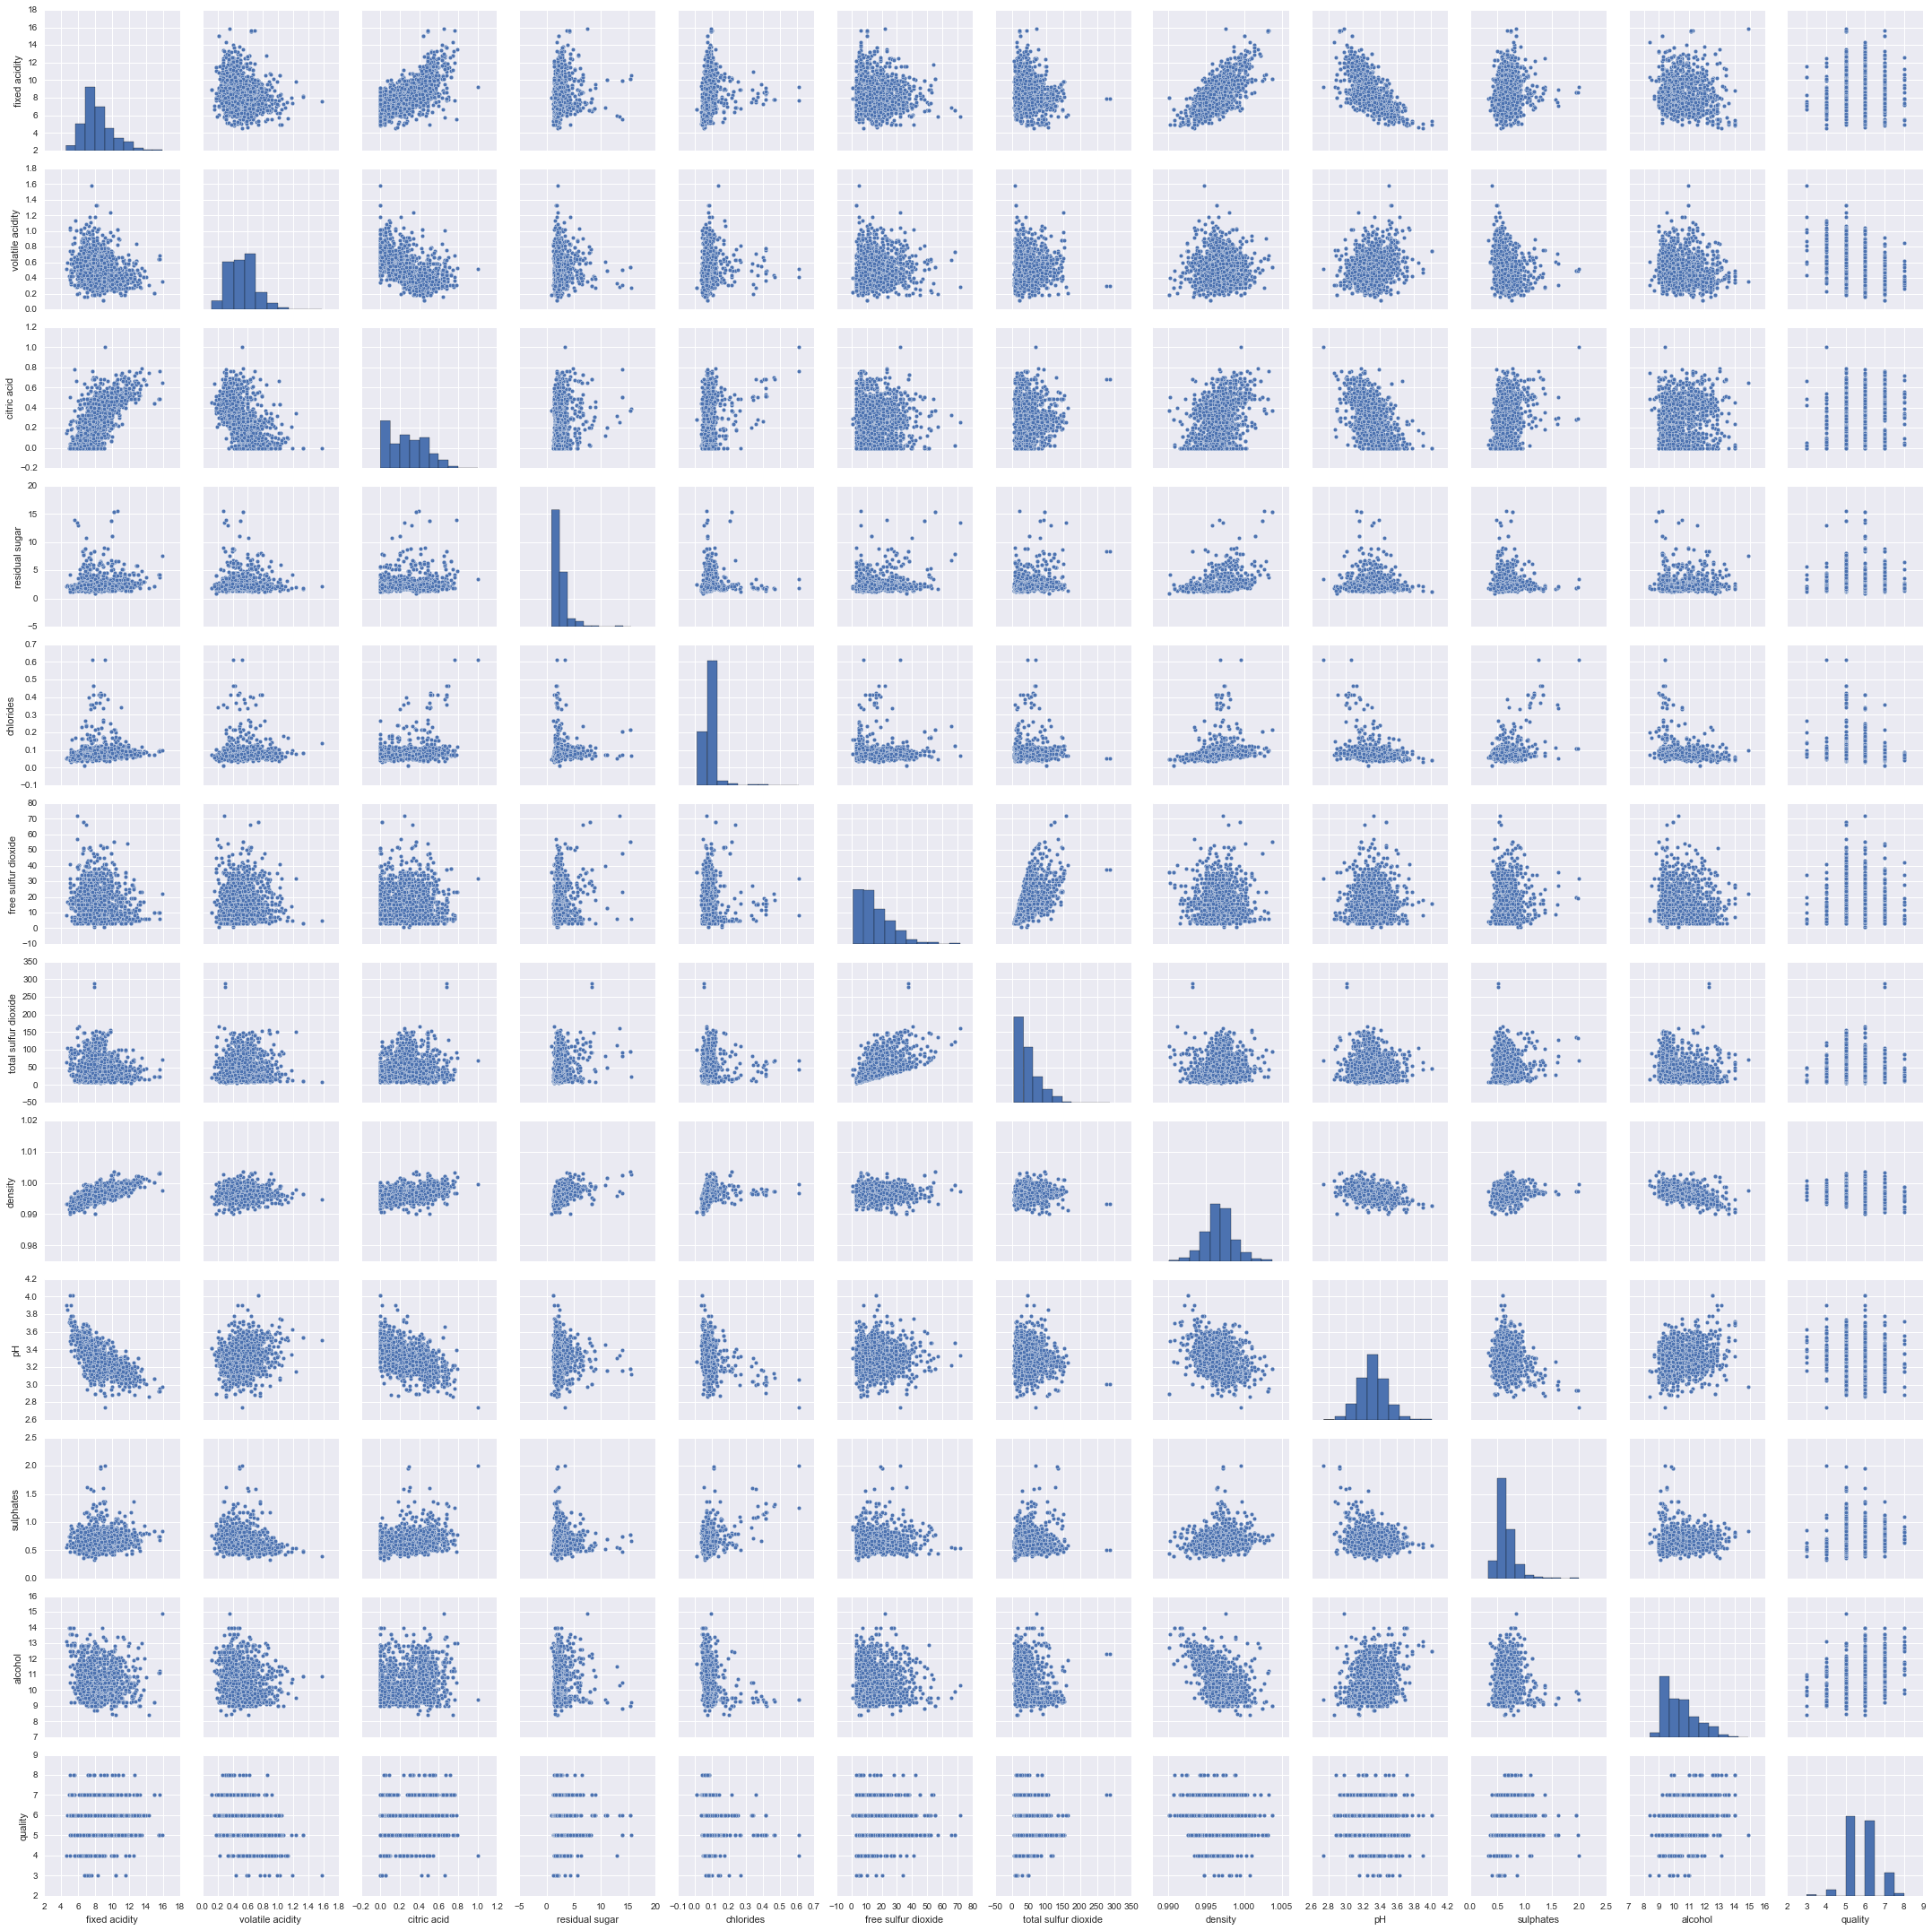

In [5]:
sb.pairplot(red_wine)

### Outliers
Some of the features show outliers. I will define a function to exclude outliers. In this case, I will exclude those points that are more than five standard deviations from the mean.

In [6]:
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        print mask.unique()
        df.loc[mask == True,col] = 0
    return df

In [7]:
column_list = red_wine.columns.tolist()

In [8]:
column_list[0:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
red_wine = outliers(red_wine, 5, column_list[0:-1])
red_wine.describe().T

[False]
[False True]
[False]
[False True]
[False True]
[False True]
[False True]
[False]
[False]
[False True]
[False]


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599,0.526832,0.177603,0.00000,0.3900,0.52000,0.640000,1.33000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.446998,1.095404,0.00000,1.9000,2.20000,2.600000,9.00000
chlorides,1599,0.081801,0.027701,0.00000,0.0700,0.07900,0.089000,0.27000
free sulfur dioxide,1599,15.829894,10.373010,0.00000,7.0000,14.00000,21.000000,68.00000
total sulfur dioxide,1599,46.113196,31.848437,0.00000,22.0000,38.00000,62.000000,165.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.649231,0.155931,0.00000,0.5500,0.62000,0.730000,1.36000


Now let's examine the data again with the outliers removed.

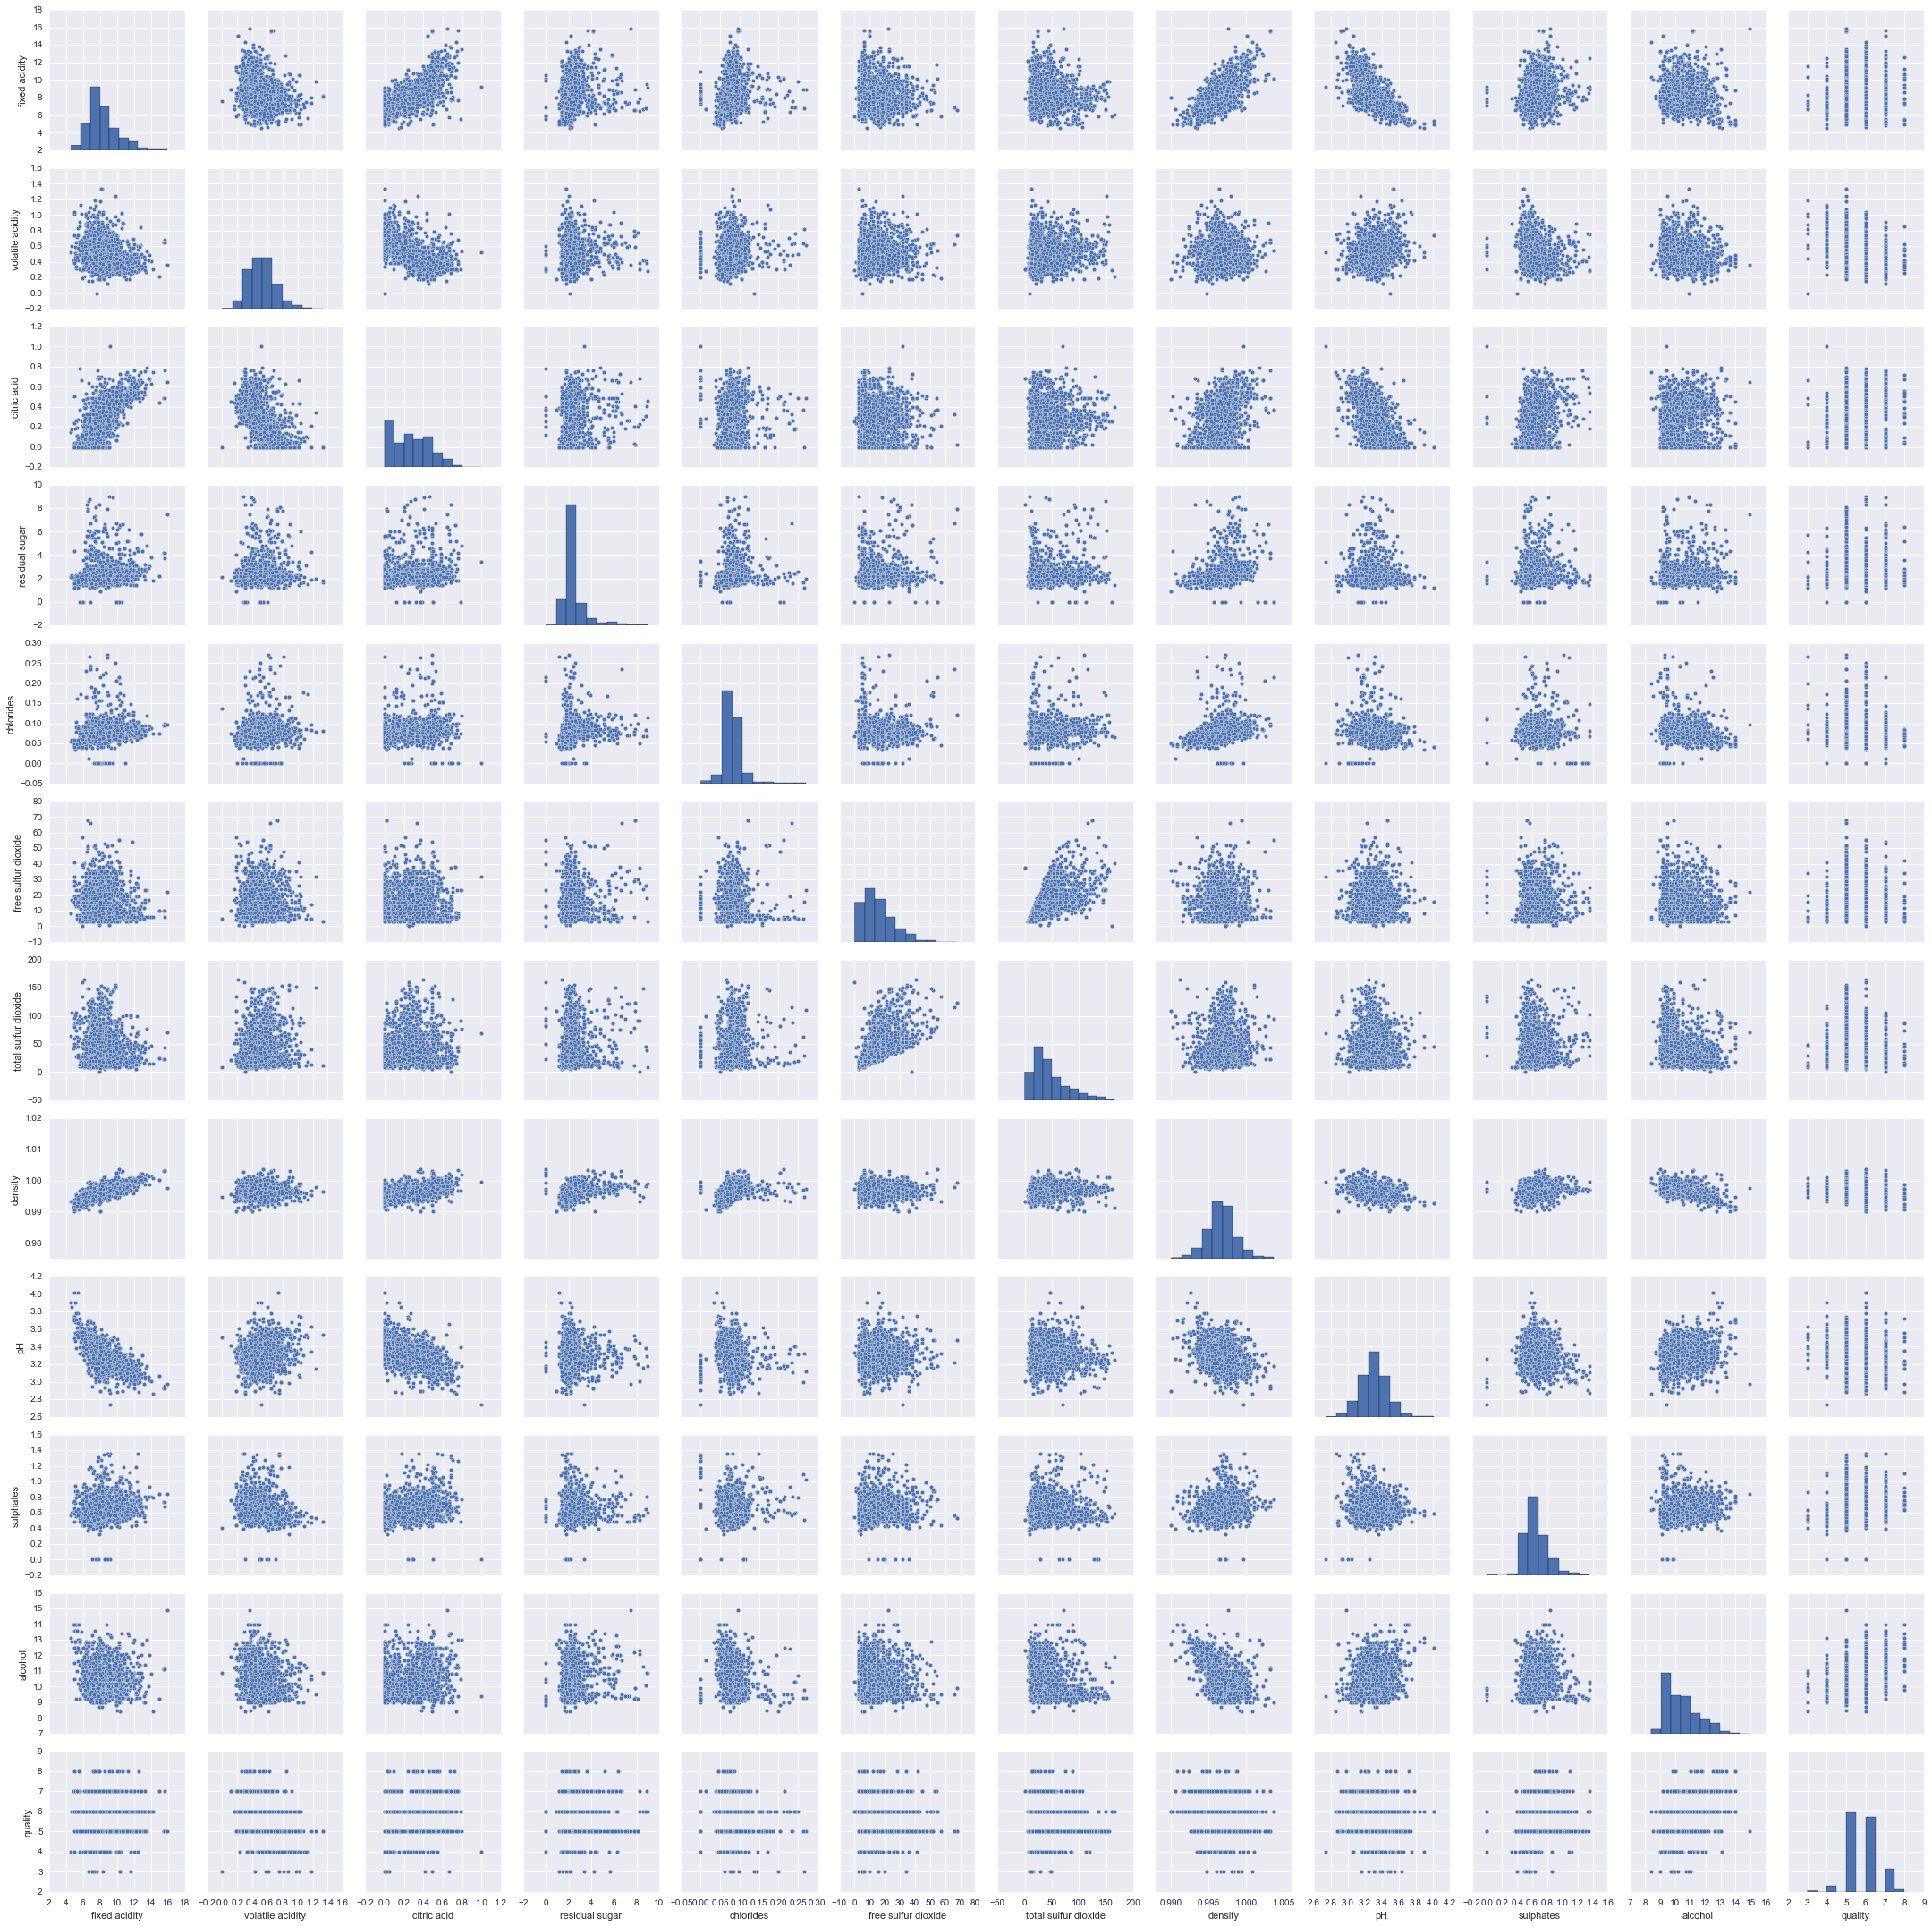

In [10]:
sb.pairplot(red_wine)

## Binning the data by category

In [11]:
print "The range is wine quality is {0}".format(np.sort(red_wine['quality'].unique()))

The range is wine quality is [3 4 5 6 7 8]


I now bin the data into three bins based on their quality, 'Bad', 'Average', and 'Good'.

In [ ]:
bins = [3, 5, 6, 8]
red_wine['category'] = pd.cut(red_wine.quality, bins, labels=['Bad', 'Average', 'Good'])

In [ ]:
sb.pairplot(red_wine.drop(['quality'],1),hue='category')

In [ ]:
red_wine.drop('quality',1).groupby('category').agg(['mean','std']).T

Notice that there is quite a bit of overlap between the average values and the bad values. I will throw out the average values and only perform a classification between the 'Good' wine and the 'Bad' wine.

In [ ]:
red_wine_newcats = red_wine[red_wine['category'].isin(['Bad','Good'])].copy()

In [ ]:
np.sort(red_wine_newcats['quality'].unique())

In [ ]:
bins = [3, 5, 8]
red_wine_newcats['category'] = pd.cut(red_wine_newcats.quality, bins, labels=['Bad', 'Good'])

In [ ]:
red_wine.shape, red_wine_newcats.shape

In [ ]:
sb.pairplot(red_wine_newcats.drop(['quality'],1),hue='category')

In [ ]:
red_wine_newcats.drop('quality',1).groupby('category').agg(['mean','std']).T

It looks like total sulfar dioxide is a good indicator of wine quality. I will use this to classify whether the wine is a 'Good' wine or a 'Bad' wine.

## Using skflow

In [ ]:
import sklearn
from sklearn import metrics, preprocessing
from sklearn.cross_validation import train_test_split

import skflow

Before using TensorFlow, I will use skflow to make the model.

### Separate data into labels and features
Here I separate the data into 'labels' (y values) and 'feature' (X values) and divide them into training and test sets using train_test_split() from scikit-learn.

In [ ]:
y_red_wine = red_wine_newcats[['category']].get_values()

In [ ]:
X_red_wine = red_wine_newcats['total sulfur dioxide'].get_values()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, random_state=42)

The y values are string categories ('Good' and 'Bad') and so need to be converted to integers so that skflow will understand the categories. This is done using fit_transform() from the CategoricalProcessor class in skflow.

In [ ]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [ ]:
n_classes = len(cat_processor.vocabularies_[0])

In [ ]:
print("There are {0} different classes.").format(n_classes)

In [ ]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [ ]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.01)

In [ ]:
classifier.fit(X_train, y_train_cat)

In [ ]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Not bad for a start! Now the model needs to be revised.

### Categorical Model with Two Features

Now I include two features, 'total sulfur dioxide' and 'density', to see if this improves the model.

In [ ]:
X_red_wine = red_wine_newcats[['total sulfur dioxide','density']].get_values()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, 
                                                    random_state=42)

In [ ]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [ ]:
n_classes = len(cat_processor.vocabularies_[0])

In [ ]:
print("There are {0} different classes.").format(n_classes)

In [ ]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [ ]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.01)

In [ ]:
classifier.fit(X_train, y_train_cat)

In [ ]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

**But, this value is worse. I need to keep playing with feature selection for this model.**

## Tensor Flow

In [ ]:
import tensorflow as tf

In [ ]:
X = tf.placeholder("float",[None,1])
Y = tf.placeholder("float",[None,3])

In [ ]:
W = tf.Variable(tf.random_normal([1,3],stddev=0.01))

In [ ]:
py_x = tf.matmul(X, W)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x,1)

In [ ]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

In [ ]:
for i in range(100):
    for (x, y) in zip(X_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})
    print i, np.mean(np.argmax(y_test,axis=1) == sess.run(predict_op, feed_dict={X: X_test, Y: y_test}))



*Reference: Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.*